In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits


In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2013, 2021)]

In [7]:
seasons

['2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21']

In [8]:
regular_passing = []
playoff_passing = []
for season in seasons:
    regular_df = LeagueDashPtStats(pt_measure_type='Passing', season_type_all_star='Regular Season', season=season, per_mode_simple='PerGame').get_data_frames()[0]
    regular_df.loc[:, 'SEASON'] = season
    regular_passing.append(regular_df)
    time.sleep(0.4)
    playoff_df = LeagueDashPtStats(pt_measure_type='Passing', season_type_all_star='Playoffs', season=season, per_mode_simple='PerGame').get_data_frames()[0]
    playoff_df.loc[:, 'SEASON'] = season
    playoff_passing.append(playoff_df)

KeyboardInterrupt: 

In [14]:
playoff_passing = []
for season in seasons:
    for playoff_round in [1, 2]:
        
        playoff_df = LeagueDashPtStats(pt_measure_type='Passing', season_type_all_star='Playoffs', season=season, per_mode_simple='PerGame', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        advanced_df = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        merged_df = pd.merge(left=playoff_df, right=advanced_df, on=('TEAM_ID', 'TEAM_NAME'))
        merged_df.loc[:, 'SEASON'] = season
        merged_df.loc[:, 'ROUND'] = playoff_round
        playoff_passing.append(merged_df)

In [10]:
team_stats = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season_type_all_star='Playoffs')

In [11]:
team_df = team_stats.get_data_frames()[0]

In [13]:
team_df.POSS

0     777
1     484
2     778
3     650
4     877
5     934
6     570
7     500
8     411
9     707
10    475
11    812
12    862
13    587
14    787
15    514
Name: POSS, dtype: int64

In [19]:
regular_full = pd.concat(regular_passing)
playoff_full = pd.concat(playoff_passing)

In [22]:
merged_df = pd.merge(left=regular_full, right=playoff_full, on=('TEAM_ID', 'TEAM_NAME', 'SEASON'), suffixes=('_REGULAR', '_PLAYOFF'))

In [25]:
cur_season = merged_df.loc[merged_df.SEASON == '2020-21']
other = merged_df.loc[merged_df.SEASON != '2020-21']

6

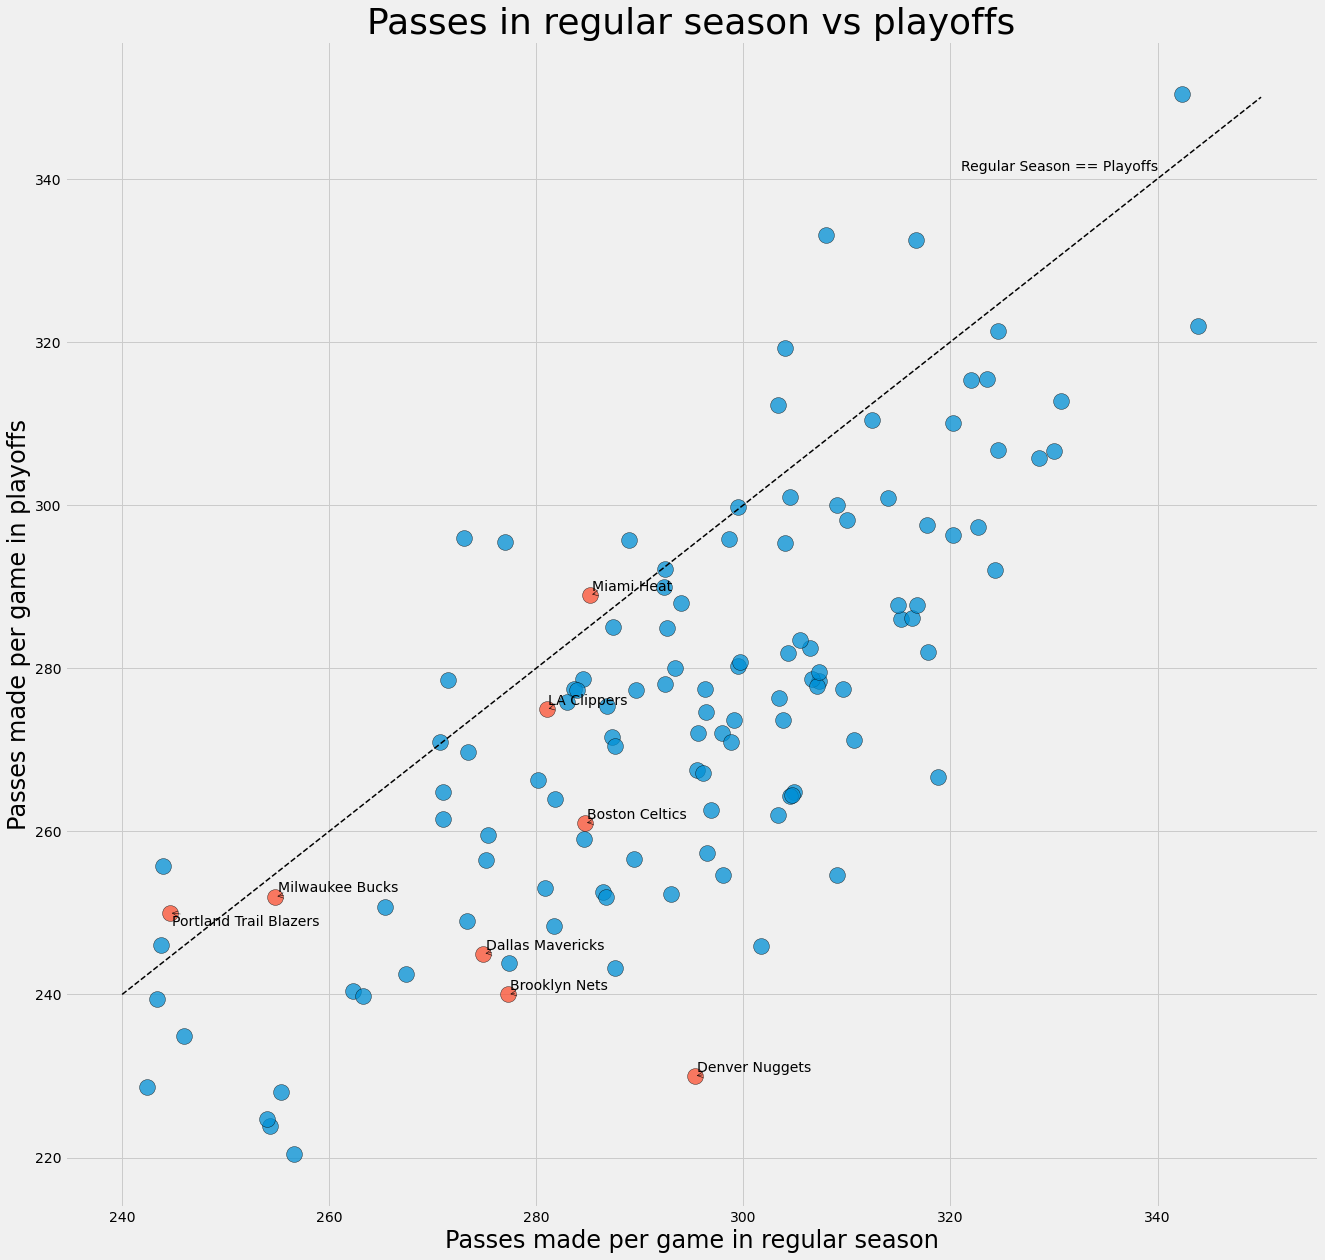

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.PASSES_MADE_REGULAR, y=other.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2013-14 up to 2019-20')
ax.scatter(x=cur_season.PASSES_MADE_REGULAR, y=cur_season.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2020-21')
texts = []
for index in range(len(cur_season)):
    item = cur_season.iloc[index]
    texts.append(ax.text(x=item.PASSES_MADE_REGULAR, y=item.PASSES_MADE_PLAYOFF, s=item.TEAM_NAME, size=14))

ax.set_title("Passes in regular season vs playoffs", size=36)
ax.set_xlabel("Passes made per game in regular season", size=24)
ax.set_ylabel("Passes made per game in playoffs", size=24)
ax.plot(np.arange(240, 355, 10), np.arange(240, 355, 10), color='black', ls='--', lw=1.5)
ax.text(x=321, y=341, s='Regular Season == Playoffs')

adjust_text(texts, arrowprops={'color': 'black', 'arrowstyle': '->'})

6

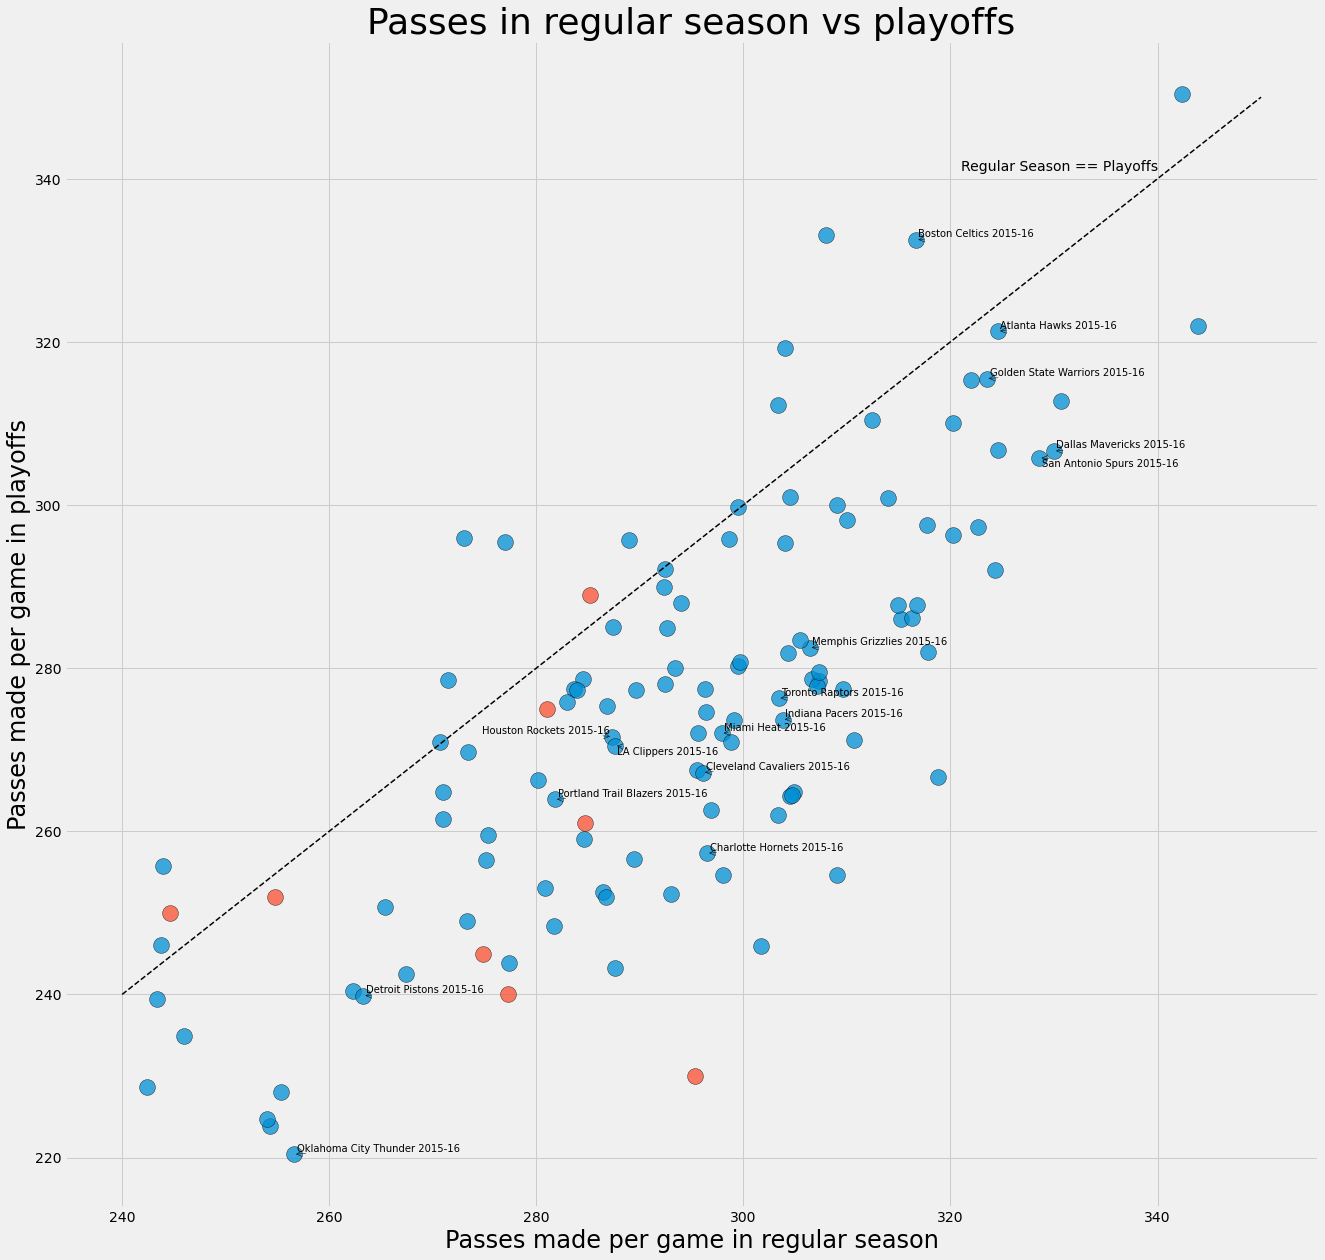

In [52]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.PASSES_MADE_REGULAR, y=other.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2013-14 up to 2019-20')
ax.scatter(x=cur_season.PASSES_MADE_REGULAR, y=cur_season.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2020-21')
texts = []

target_df = merged_df.loc[merged_df.SEASON == '2015-16']
for index in range(len(target_df)):
    item = target_df.iloc[index]
    texts.append(ax.text(x=item.PASSES_MADE_REGULAR, y=item.PASSES_MADE_PLAYOFF, s=f"{item.TEAM_NAME} {item.SEASON}", size=10))

ax.set_title("Passes in regular season vs playoffs", size=36)
ax.set_xlabel("Passes made per game in regular season", size=24)
ax.set_ylabel("Passes made per game in playoffs", size=24)
ax.plot(np.arange(240, 355, 10), np.arange(240, 355, 10), color='black', ls='--', lw=1.5)
ax.text(x=321, y=341, s='Regular Season == Playoffs')

adjust_text(texts, arrowprops={'color': 'black', 'arrowstyle': '->'})

300

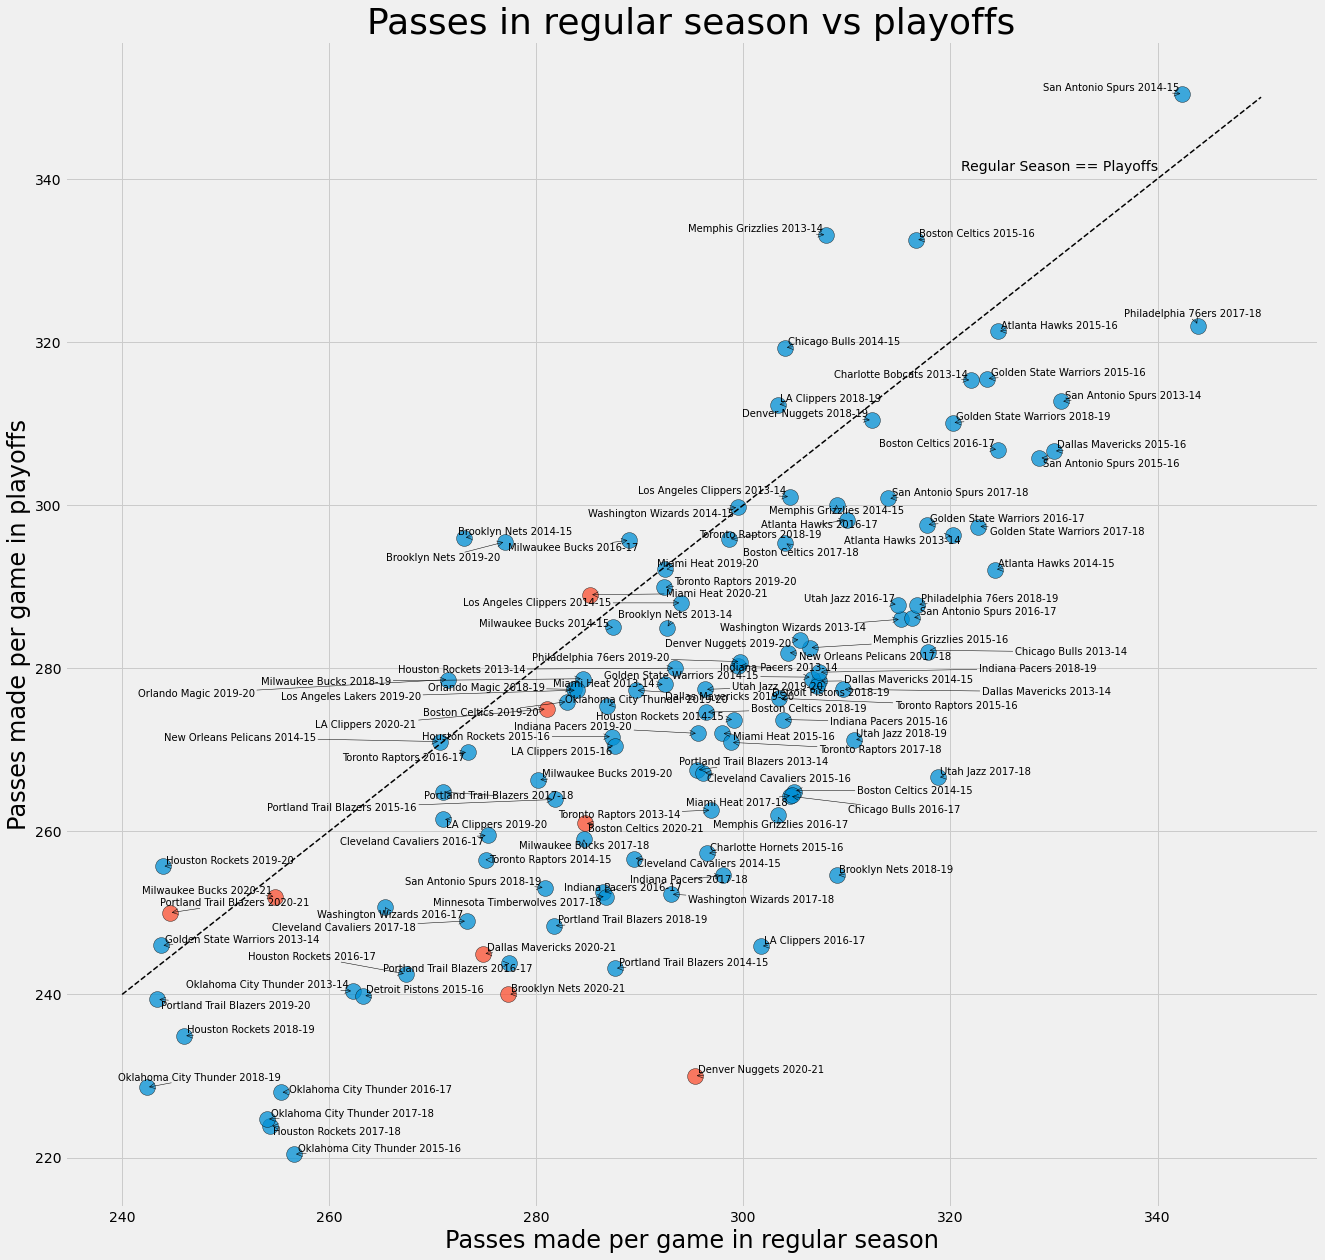

In [46]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=other.PASSES_MADE_REGULAR, y=other.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2013-14 up to 2019-20')
ax.scatter(x=cur_season.PASSES_MADE_REGULAR, y=cur_season.PASSES_RECEIVED_PLAYOFF, s=250, edgecolors='black', alpha=0.75, label='2020-21')
texts = []
for index in range(len(merged_df)):
    item = merged_df.iloc[index]
    texts.append(ax.text(x=item.PASSES_MADE_REGULAR, y=item.PASSES_MADE_PLAYOFF, s=f"{item.TEAM_NAME} {item.SEASON}", size=10))

ax.set_title("Passes in regular season vs playoffs", size=36)
ax.set_xlabel("Passes made per game in regular season", size=24)
ax.set_ylabel("Passes made per game in playoffs", size=24)
ax.plot(np.arange(240, 355, 10), np.arange(240, 355, 10), color='black', ls='--', lw=1.5)
ax.text(x=321, y=341, s='Regular Season == Playoffs')

adjust_text(texts, arrowprops={'color': 'black', 'arrowstyle': '->'})

In [44]:
pd.set_option('display.max_rows', 50)


In [55]:
merged_df.loc[:, 'PLAYOFF_DIFF'] = merged_df.PASSES_MADE_PLAYOFF - merged_df.PASSES_MADE_REGULAR

In [58]:
merged_df.sort_values(by='PLAYOFF_DIFF', ascending=True).loc[:, ['TEAM_NAME', 'SEASON', 'PASSES_MADE_REGULAR', 'PASSES_MADE_PLAYOFF', 'PLAYOFF_DIFF']]

,TEAM_NAME,SEASON,PASSES_MADE_REGULAR,PASSES_MADE_PLAYOFF,PLAYOFF_DIFF
115,Denver Nuggets,2020-21,295.3,230.0,-65.3
55,LA Clippers,2016-17,301.7,245.9,-55.8
81,Brooklyn Nets,2018-19,309.0,254.6,-54.4
78,Utah Jazz,2017-18,318.8,266.6,-52.2
28,Portland Trail Blazers,2014-15,287.6,243.2,-44.4
68,Indiana Pacers,2017-18,298.0,254.6,-43.4
56,Memphis Grizzlies,2016-17,303.3,262.0,-41.3
79,Washington Wizards,2017-18,293.0,252.3,-40.7
69,Miami Heat,2017-18,304.7,264.4,-40.3
50,Chicago Bulls,2016-17,304.5,264.3,-40.2


## Passing deep dive

In [8]:
regular_passing = []
for season in seasons:

    regular_df = LeagueDashPtStats(pt_measure_type='Passing', season_type_all_star='Regular Season', season=season, per_mode_simple='PerGame').get_data_frames()[0]
    time.sleep(0.4)
    advanced_df = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Regular Season').get_data_frames()[0]
    time.sleep(0.4)
    merged_df = pd.merge(left=regular_df, right=advanced_df, on=('TEAM_ID', 'TEAM_NAME'))
    merged_df.loc[:, 'SEASON'] = season
    regular_passing.append(merged_df)

In [9]:
full_regular = pd.concat(regular_passing)

In [10]:
full_regular.loc[:, 'POSS_G'] = full_regular.POSS / full_regular.GP_x

full_regular.loc[:, 'PASS_POSS'] = full_regular.PASSES_MADE / full_regular.POSS_G

In [11]:
playoff_passing = []
for season in seasons:
    for playoff_round in [1, 2]:
        
        playoff_df = LeagueDashPtStats(pt_measure_type='Passing', season_type_all_star='Playoffs', season=season, per_mode_simple='PerGame', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        advanced_df = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        merged_df = pd.merge(left=playoff_df, right=advanced_df, on=('TEAM_ID', 'TEAM_NAME'))
        merged_df.loc[:, 'SEASON'] = season
        merged_df.loc[:, 'ROUND'] = playoff_round
        playoff_passing.append(merged_df)

In [12]:
full_df = pd.concat(playoff_passing)

In [13]:
full_df.loc[:, 'POSS_G'] = full_df.POSS / full_df.GP_x

In [14]:
full_df.loc[:, 'PASS_POSS'] = full_df.PASSES_MADE / full_df.POSS_G

In [15]:
full_df.sort_values(by='PASS_POSS', ascending=True).iloc[2:]

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GP_x,W_x,L_x,MIN_x,PASSES_MADE,PASSES_RECEIVED,AST,...,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,CFID,CFPARAMS,SEASON,ROUND,POSS_G,PASS_POSS
4,1610612760,OKC,Oklahoma City Thunder,6,4,2,240.0,211.0,211.0,19.2,...,6,4,3,6,10,Oklahoma City Thunder,2015-16,2,93.500000,2.256684
9,1610612760,OKC,Oklahoma City Thunder,5,1,4,240.0,228.6,228.6,22.6,...,11,11,7,10,10,Oklahoma City Thunder,2018-19,1,100.800000,2.267857
9,1610612760,OKC,Oklahoma City Thunder,6,2,4,240.0,224.7,224.7,16.3,...,15,15,5,12,10,Oklahoma City Thunder,2017-18,1,98.333333,2.285085
10,1610612760,OKC,Oklahoma City Thunder,5,1,4,240.0,228.0,228.0,19.8,...,14,15,3,13,10,Oklahoma City Thunder,2016-17,1,99.200000,2.298387
3,1610612745,HOU,Houston Rockets,5,4,1,240.0,227.4,227.4,20.4,...,3,3,3,2,10,Houston Rockets,2017-18,2,98.800000,2.301619
13,1610612757,POR,Portland Trail Blazers,5,1,4,240.0,239.4,239.4,17.8,...,14,14,7,15,10,Portland Trail Blazers,2019-20,1,102.400000,2.337891
12,1610612760,OKC,Oklahoma City Thunder,5,4,1,240.0,219.0,219.0,21.4,...,4,2,7,3,10,Oklahoma City Thunder,2015-16,1,93.000000,2.354839
0,1610612738,BOS,Boston Celtics,4,4,0,240.0,226.8,226.8,19.0,...,11,9,13,4,10,Boston Celtics,2019-20,1,95.750000,2.368668
5,1610612745,HOU,Houston Rockets,5,4,1,240.0,235.6,235.6,16.6,...,8,5,3,4,10,Houston Rockets,2016-17,1,99.200000,2.375000
7,1610612763,MEM,Memphis Grizzlies,5,1,4,240.0,237.8,237.8,22.0,...,10,12,5,10,10,Memphis Grizzlies,2020-21,1,100.000000,2.378000


In [19]:
full_df.sort_values(by='PASS_POSS', ascending=False)

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GP_x,W_x,L_x,MIN_x,PASSES_MADE,PASSES_RECEIVED,AST,...,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,CFID,CFPARAMS,SEASON,ROUND,POSS_G,PASS_POSS
3,1610612741,CHI,Chicago Bulls,6,4,2,248.3,362.3,362.3,26.2,...,7,5,13,2,10,Chicago Bulls,2014-15,1,96.500000,3.754404
13,1610612759,SAS,San Antonio Spurs,7,3,4,243.6,350.4,350.4,24.1,...,5,8,7,9,10,San Antonio Spurs,2014-15,1,96.000000,3.650000
14,1610612759,SAS,San Antonio Spurs,4,4,0,240.0,320.8,320.8,21.5,...,1,1,11,1,10,San Antonio Spurs,2015-16,1,91.000000,3.525275
0,1610612738,BOS,Boston Celtics,7,4,3,243.6,330.0,330.0,21.6,...,13,12,13,10,10,Boston Celtics,2017-18,1,94.142857,3.505311
3,1610612748,MIA,Miami Heat,5,4,1,240.0,296.0,296.0,16.8,...,1,1,7,2,10,Miami Heat,2013-14,2,84.800000,3.490566
9,1610612763,MEM,Memphis Grizzlies,7,3,4,254.3,333.1,333.1,21.7,...,16,16,9,11,10,Memphis Grizzlies,2013-14,1,95.857143,3.474963
2,1610612766,CHA,Charlotte Bobcats,4,0,4,240.0,315.3,315.3,19.8,...,7,10,11,16,10,Charlotte Bobcats,2013-14,1,91.000000,3.464835
6,1610612744,GSW,Golden State Warriors,5,4,1,240.0,342.2,342.2,28.8,...,2,3,1,2,10,Golden State Warriors,2015-16,1,99.400000,3.442656
9,1610612763,MEM,Memphis Grizzlies,5,4,1,240.0,317.4,317.4,18.8,...,12,11,15,4,10,Memphis Grizzlies,2014-15,1,92.200000,3.442516
10,1610612748,MIA,Miami Heat,4,4,0,240.0,306.0,306.0,21.0,...,2,1,11,1,10,Miami Heat,2013-14,1,90.500000,3.381215


## Comparison with regular season

In [32]:
reg_po = pd.merge(left=full_df, right=full_regular, on=('TEAM_ID', 'TEAM_NAME', 'SEASON'), suffixes=('_PLAYOFFS', '_REGULAR'))

In [37]:
reg_po.loc[:, 'PASS_POSS_DIFF'] = reg_po.PASS_POSS_PLAYOFFS - reg_po.PASS_POSS_REGULAR

In [54]:
subset = reg_po.loc[:, ['TEAM_ID', 'TEAM_NAME', 'SEASON', 'ROUND', 'PASS_POSS_PLAYOFFS', 'PASS_POSS_REGULAR', 'PASS_POSS_DIFF']]

In [56]:
sorted_data = subset.sort_values(by='PASS_POSS_PLAYOFFS').iloc[2:17]

In [65]:
team_root_dir = f'../../../team_logos_id/'
player_root_dir = f'../player_imgs/'

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from pathlib import Path
zoom = 1.0

def get_player_img(player_id):
    #print(path)
    if not Path(f'{player_root_dir}{player_id}.png').exists():
        url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
        response = requests.get(url)
        with open(f'{player_root_dir}{player_id}.png', 'wb') as f:
            f.write(response.content)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id, zoom=zoom):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

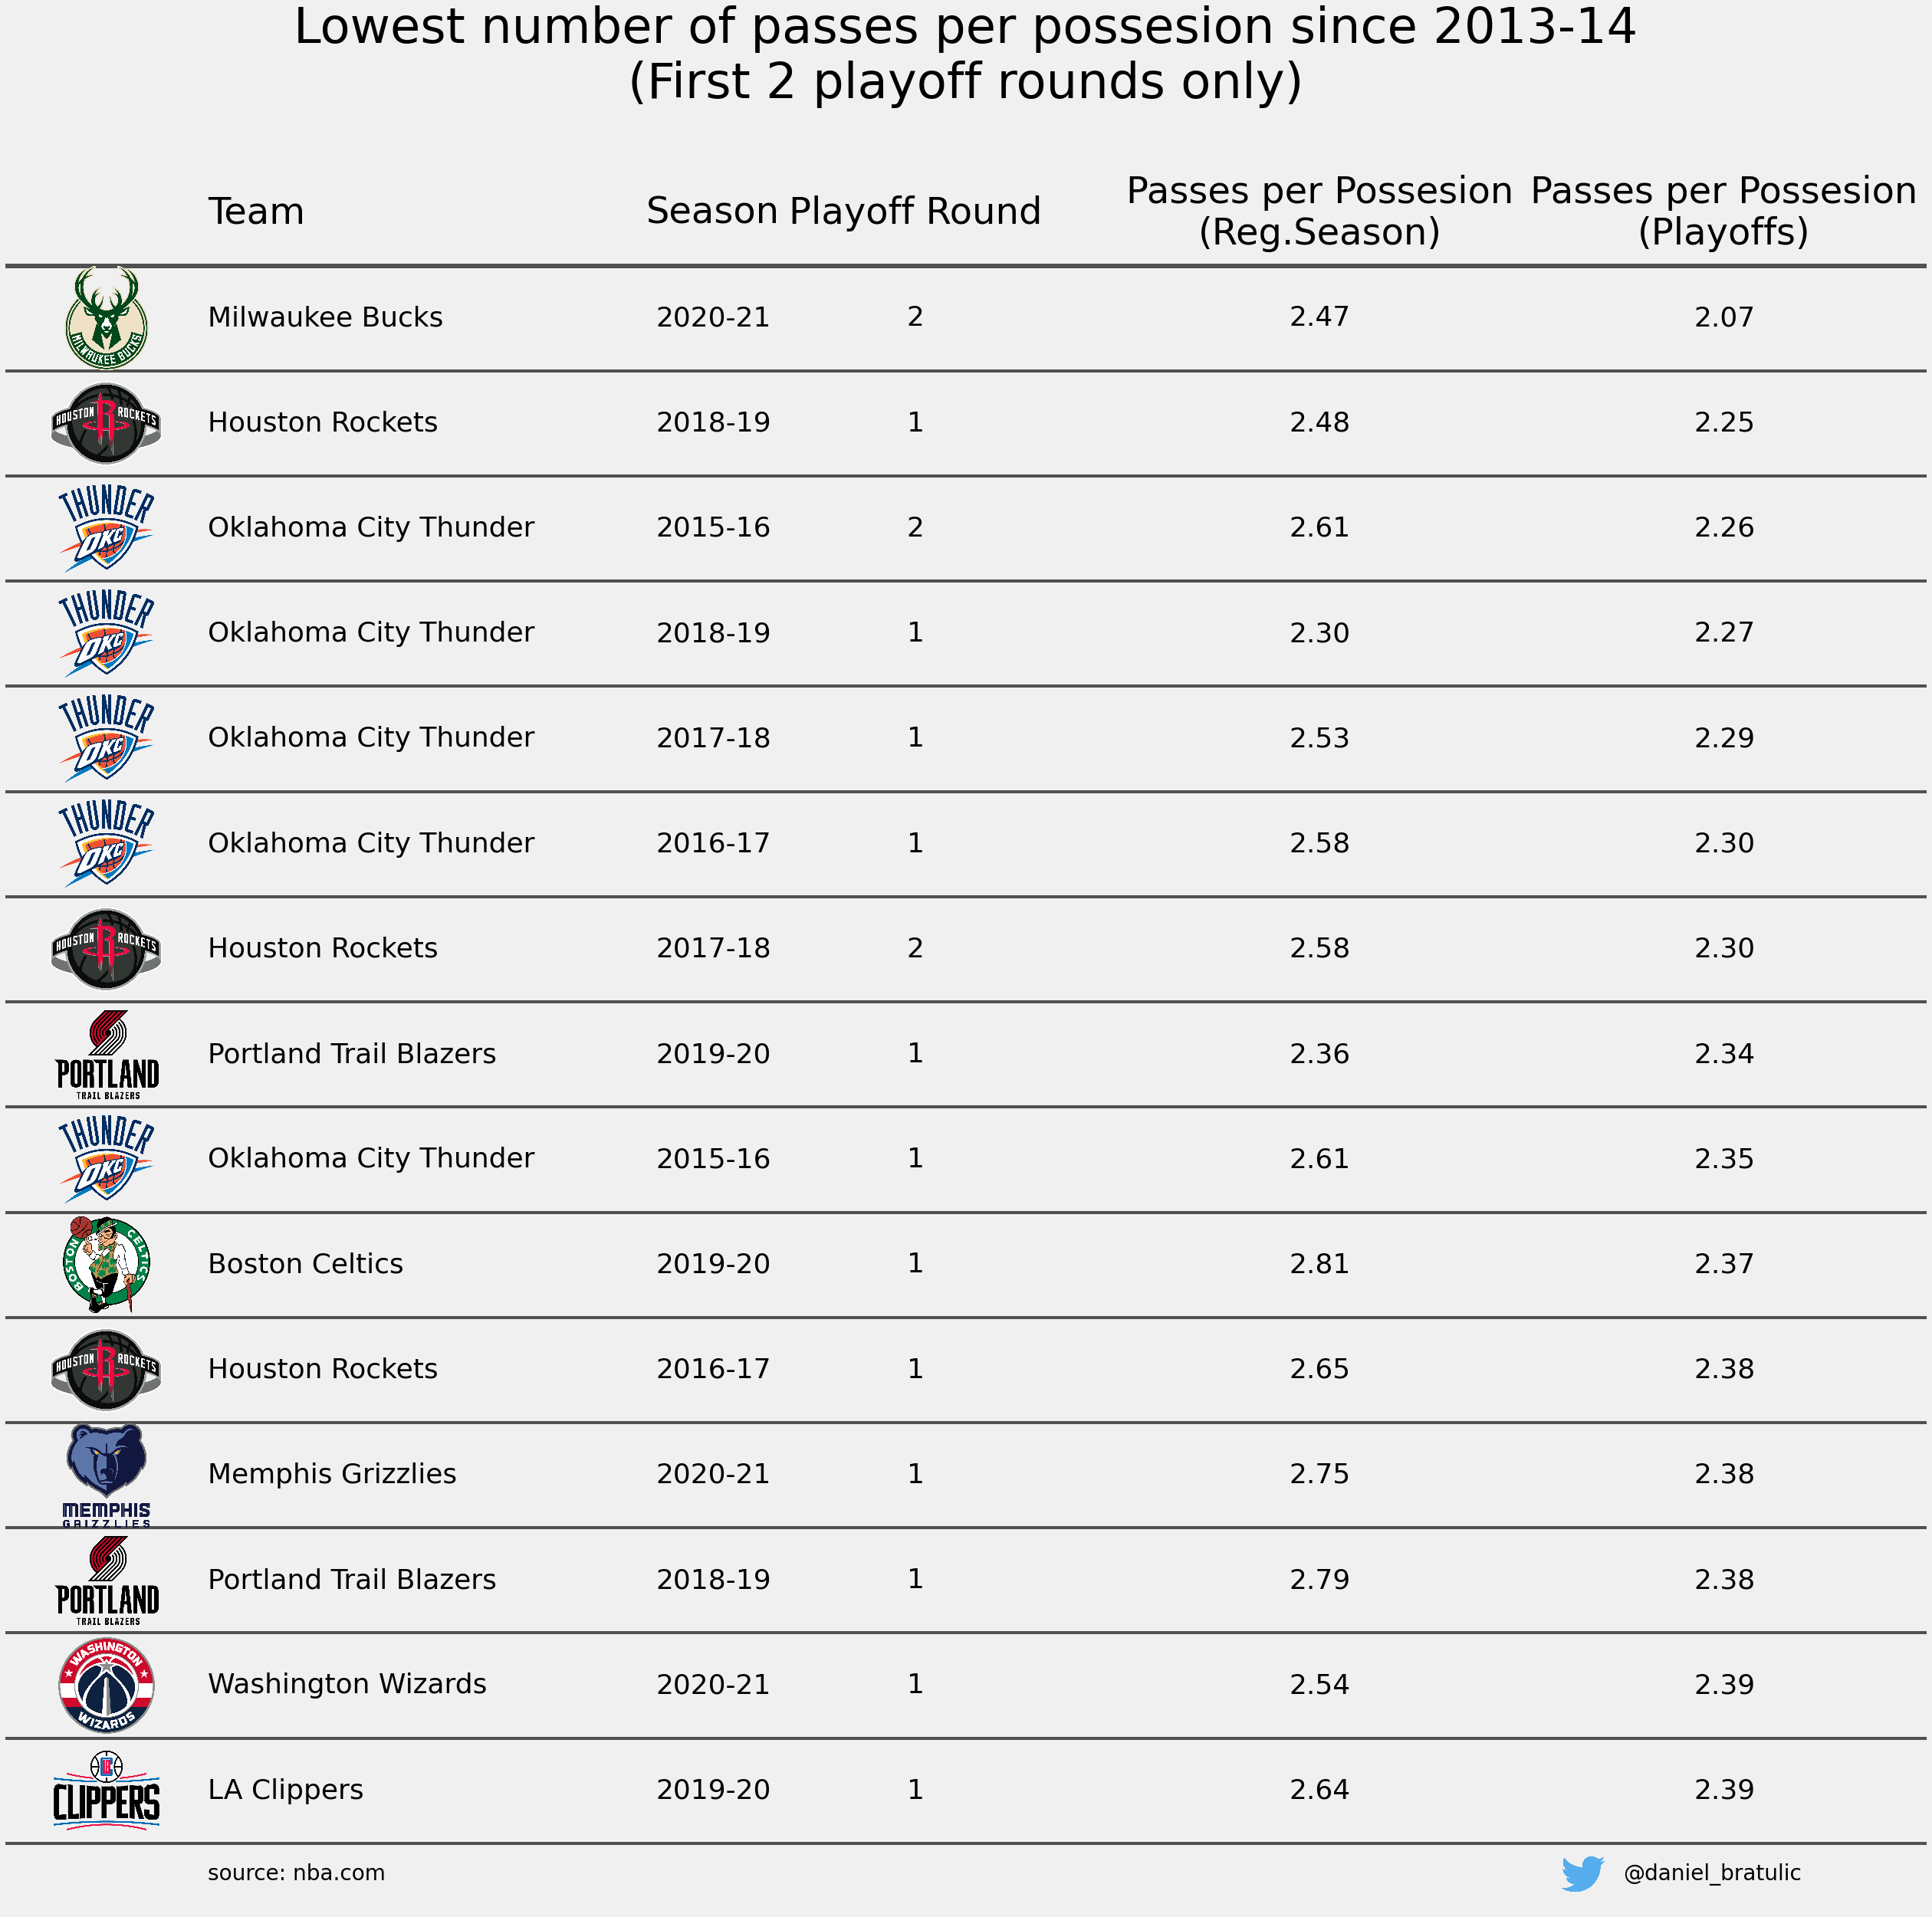

In [76]:
fig, ax = plt.subplots(figsize=(40, 40))
font_size = 36
font_title = 48
title_size = 64
top = len(sorted_data)
#top = 10

for i in range(top):
    item = sorted_data.iloc[i]
    y_coord = top - i - 1
    #if i % 2 == 1:
    #    color = bball_cofee
    #    rect = Rectangle((-0.5, y_coord + 0.5), width=5, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    ab = AnnotationBbox(get_team_img(item.TEAM_ID, zoom=0.2), (0.05, y_coord), frameon=False)
    ax.add_artist(ab)
    ax.text(x=0.1, y=y_coord, ha='left', va='center', s=item.TEAM_NAME, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#1A1A1A', alpha=0.75, lw=4)
    
    ax.text(x=0.35, y=y_coord, ha='center', va='center', s=f"{item.SEASON}", size=font_size)
    ax.text(x=0.45, y=y_coord, ha='center', va='center', s=f"{item.ROUND}", size=font_size)
    ax.text(x=0.65, y=y_coord, ha='center', va='center', s=f"{item.PASS_POSS_REGULAR:.2f}", size=font_size)
    ax.text(x=0.85, y=y_coord, ha='center', va='center', s=f"{item.PASS_POSS_PLAYOFFS:.2f}", size=font_size)
    #ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (0.05, y_coord), frameon=False)
    
    
ax.text(x=0.1, y=top, s='Team', ha='left', va='center', size=font_title)
ax.text(x=0.35, y=top, s='Season', ha='center', va='center', size=font_title)
ax.text(x=0.45, y=top, s='Playoff Round', ha='center', va='center', size=font_title)
ax.text(x=0.65, y=top, s='Passes per Possesion\n(Reg.Season)', ha='center', va='center', size=font_title)
ax.text(x=0.85, y=top, s='Passes per Possesion\n(Playoffs)', ha='center', va='center', size=font_title)


ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, alpha=0.75, lw=6, color='#1A1A1A')
ax.set_title("Lowest number of passes per possesion since 2013-14\n(First 2 playoff rounds only)", size=title_size)

ab = AnnotationBbox(OffsetImage(plt.imread(f'../../../twitter_logo.png'), zoom=0.05), (0.78, -0.8), frameon=False)
ax.add_artist(ab)
ax.text(x=0.8, y=-0.85, ha='left', s='@daniel_bratulic', size=28)
ax.text(x=0.1, y=-0.85, ha='left', s='source: nba.com', size=28)

ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=0, right=0.95)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])

In [70]:
subset.sort_values(by='PASS_POSS_DIFF').iloc[2:17]

,TEAM_ID,TEAM_NAME,SEASON,ROUND,PASS_POSS_PLAYOFFS,PASS_POSS_REGULAR,PASS_POSS_DIFF
118,1610612762,Utah Jazz,2017-18,2,2.508197,3.287838,-0.779641
122,1610612751,Brooklyn Nets,2018-19,1,2.415560,2.997870,-0.582311
25,1610612737,Atlanta Hawks,2014-15,2,2.894921,3.420270,-0.525349
105,1610612748,Miami Heat,2017-18,1,2.602362,3.090883,-0.488521
20,1610612759,San Antonio Spurs,2013-14,2,2.958506,3.438240,-0.479734
32,1610612742,Dallas Mavericks,2014-15,1,2.708171,3.159303,-0.451132
144,1610612738,Boston Celtics,2019-20,1,2.368668,2.808546,-0.439877
18,1610612757,Portland Trail Blazers,2013-14,2,2.639752,3.055612,-0.415860
138,1610612757,Portland Trail Blazers,2018-19,1,2.382178,2.793494,-0.411316
87,1610612757,Portland Trail Blazers,2016-17,1,2.401970,2.812413,-0.410443


## Pull ups

In [77]:
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot

In [79]:
pullups = LeagueDashTeamPtShot(per_mode_simple='PerGame', season='2020-21', general_range_nullable='Pullups').get_data_frames()[0]

In [82]:
cs_shot = LeagueDashTeamPtShot(per_mode_simple='PerGame', season='2020-21', general_range_nullable='Catch and Shoot').get_data_frames()[0]

In [83]:
merged_df = pd.merge(left=pullups, right=cs_shot, on=('TEAM_ID', 'TEAM_NAME', 'TEAM_ABBERVIATION'), suffixes=('_PULLUP', '_CATCH_AND_SHOOT'))

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1610612745,Houston Rockets,HOU,72,72,0.338,10.31,29.56,0.349,0.516,0.012,0.42,1.04,0.400,0.326,9.89,28.51,0.347
1,1610612756,Phoenix Suns,PHX,72,72,0.337,11.75,29.51,0.398,0.568,0.041,1.72,3.61,0.477,0.296,10.03,25.90,0.387
2,1610612748,Miami Heat,MIA,72,72,0.348,11.00,29.15,0.377,0.549,0.029,1.00,2.43,0.411,0.319,10.00,26.72,0.374
3,1610612761,Toronto Raptors,TOR,72,72,0.328,11.07,29.06,0.381,0.559,0.019,0.71,1.68,0.421,0.309,10.36,27.38,0.378
4,1610612744,Golden State Warriors,GSW,72,72,0.330,11.00,28.88,0.381,0.559,0.021,0.72,1.83,0.394,0.309,10.28,27.04,0.380
5,1610612741,Chicago Bulls,CHI,72,72,0.326,10.92,28.86,0.378,0.545,0.039,1.29,3.42,0.378,0.287,9.63,25.44,0.378
6,1610612743,Denver Nuggets,DEN,72,72,0.316,11.19,27.93,0.401,0.576,0.034,1.42,3.04,0.466,0.282,9.78,24.89,0.393
7,1610612742,Dallas Mavericks,DAL,72,72,0.319,10.43,27.83,0.375,0.547,0.021,0.82,1.82,0.450,0.298,9.61,26.01,0.369
8,1610612746,LA Clippers,LAC,72,72,0.323,12.15,27.76,0.438,0.630,0.032,1.46,2.76,0.528,0.291,10.69,25.00,0.428
9,1610612750,Minnesota Timberwolves,MIN,72,72,0.306,10.01,27.76,0.361,0.534,0.012,0.42,1.10,0.380,0.293,9.60,26.67,0.360


In [106]:
shot_data = []

for season in seasons:
    pullups = LeagueDashTeamPtShot(per_mode_simple='PerGame', season=season, general_range_nullable='Pullups').get_data_frames()[0]
    time.sleep(0.4)
    cs_shot = LeagueDashTeamPtShot(per_mode_simple='PerGame', season=season, general_range_nullable='Catch and Shoot').get_data_frames()[0]
    time.sleep(0.4)

    merged_df = pd.merge(left=pullups, right=cs_shot, on=('TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION'), suffixes=('_PULLUP', '_CATCH_AND_SHOOT'))
    
    for playoff_round in [1, 2]:
        po_pullups = LeagueDashTeamPtShot(per_mode_simple='PerGame', season=season, general_range_nullable='Pullups', season_type_all_star='Playoffs', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        po_cs_shot = LeagueDashTeamPtShot(per_mode_simple='PerGame', season=season, general_range_nullable='Catch and Shoot', season_type_all_star='Playoffs', po_round_nullable=playoff_round).get_data_frames()[0]
        time.sleep(0.4)
        po_merged_df = pd.merge(left=po_pullups, right=po_cs_shot, on=('TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION'), suffixes=('_PULLUP', '_CATCH_AND_SHOOT'))
        full_merged_df = pd.merge(left=merged_df, right=po_merged_df, on=('TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION'), suffixes=('_REGULAR', '_PLAYOFFS'))
        full_merged_df.loc[:, 'SEASON'] = season
        full_merged_df.loc[:, 'ROUND'] = playoff_round
        shot_data.append(full_merged_df)

In [107]:
concat_df = pd.concat(shot_data)

In [108]:
concat_df.loc[:, 'FGA_SUM_REGULAR'] = concat_df.FGA_PULLUP_REGULAR + concat_df.FGA_CATCH_AND_SHOOT_REGULAR
concat_df.loc[:, 'FGA_SUM_PLAYOFFS'] = concat_df.FGA_PULLUP_PLAYOFFS + concat_df.FGA_CATCH_AND_SHOOT_PLAYOFFS

In [109]:
concat_df.loc[:, 'FGA_PCT_CATCH_AND_SHOOT_REGULAR'] = concat_df.FGA_CATCH_AND_SHOOT_REGULAR / concat_df.FGA_SUM_REGULAR * 100
concat_df.loc[:, 'FGA_PCT_PULLUP_REGULAR'] = concat_df.FGA_PULLUP_REGULAR / concat_df.FGA_SUM_REGULAR * 100

concat_df.loc[:, 'FGA_PCT_CATCH_AND_SHOOT_PLAYOFFS'] = concat_df.FGA_CATCH_AND_SHOOT_PLAYOFFS / concat_df.FGA_SUM_PLAYOFFS * 100
concat_df.loc[:, 'FGA_PCT_PULLUP_PLAYOFFS'] = concat_df.FGA_PULLUP_PLAYOFFS / concat_df.FGA_SUM_PLAYOFFS * 100


In [117]:
interesting_data = concat_df.loc[:, ['TEAM_ID', 'TEAM_NAME', 'SEASON', 'ROUND',
       'FGA_SUM_REGULAR', 'FGA_SUM_PLAYOFFS',
       'FGA_PCT_CATCH_AND_SHOOT_REGULAR', 'FGA_PCT_PULLUP_REGULAR',
       'FGA_PCT_CATCH_AND_SHOOT_PLAYOFFS', 'FGA_PCT_PULLUP_PLAYOFFS']]

In [118]:
interesting_data.loc[:, 'PULLUP_DIFF'] = interesting_data.FGA_PCT_PULLUP_PLAYOFFS - interesting_data.FGA_PCT_PULLUP_REGULAR
interesting_data.loc[:, 'CATCH_SHOOT_DIFF'] = interesting_data.FGA_PCT_CATCH_AND_SHOOT_PLAYOFFS - interesting_data.FGA_PCT_CATCH_AND_SHOOT_REGULAR

In [119]:
top_change = interesting_data.sort_values(by='PULLUP_DIFF', ascending=False).iloc[:15]

[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, '')]

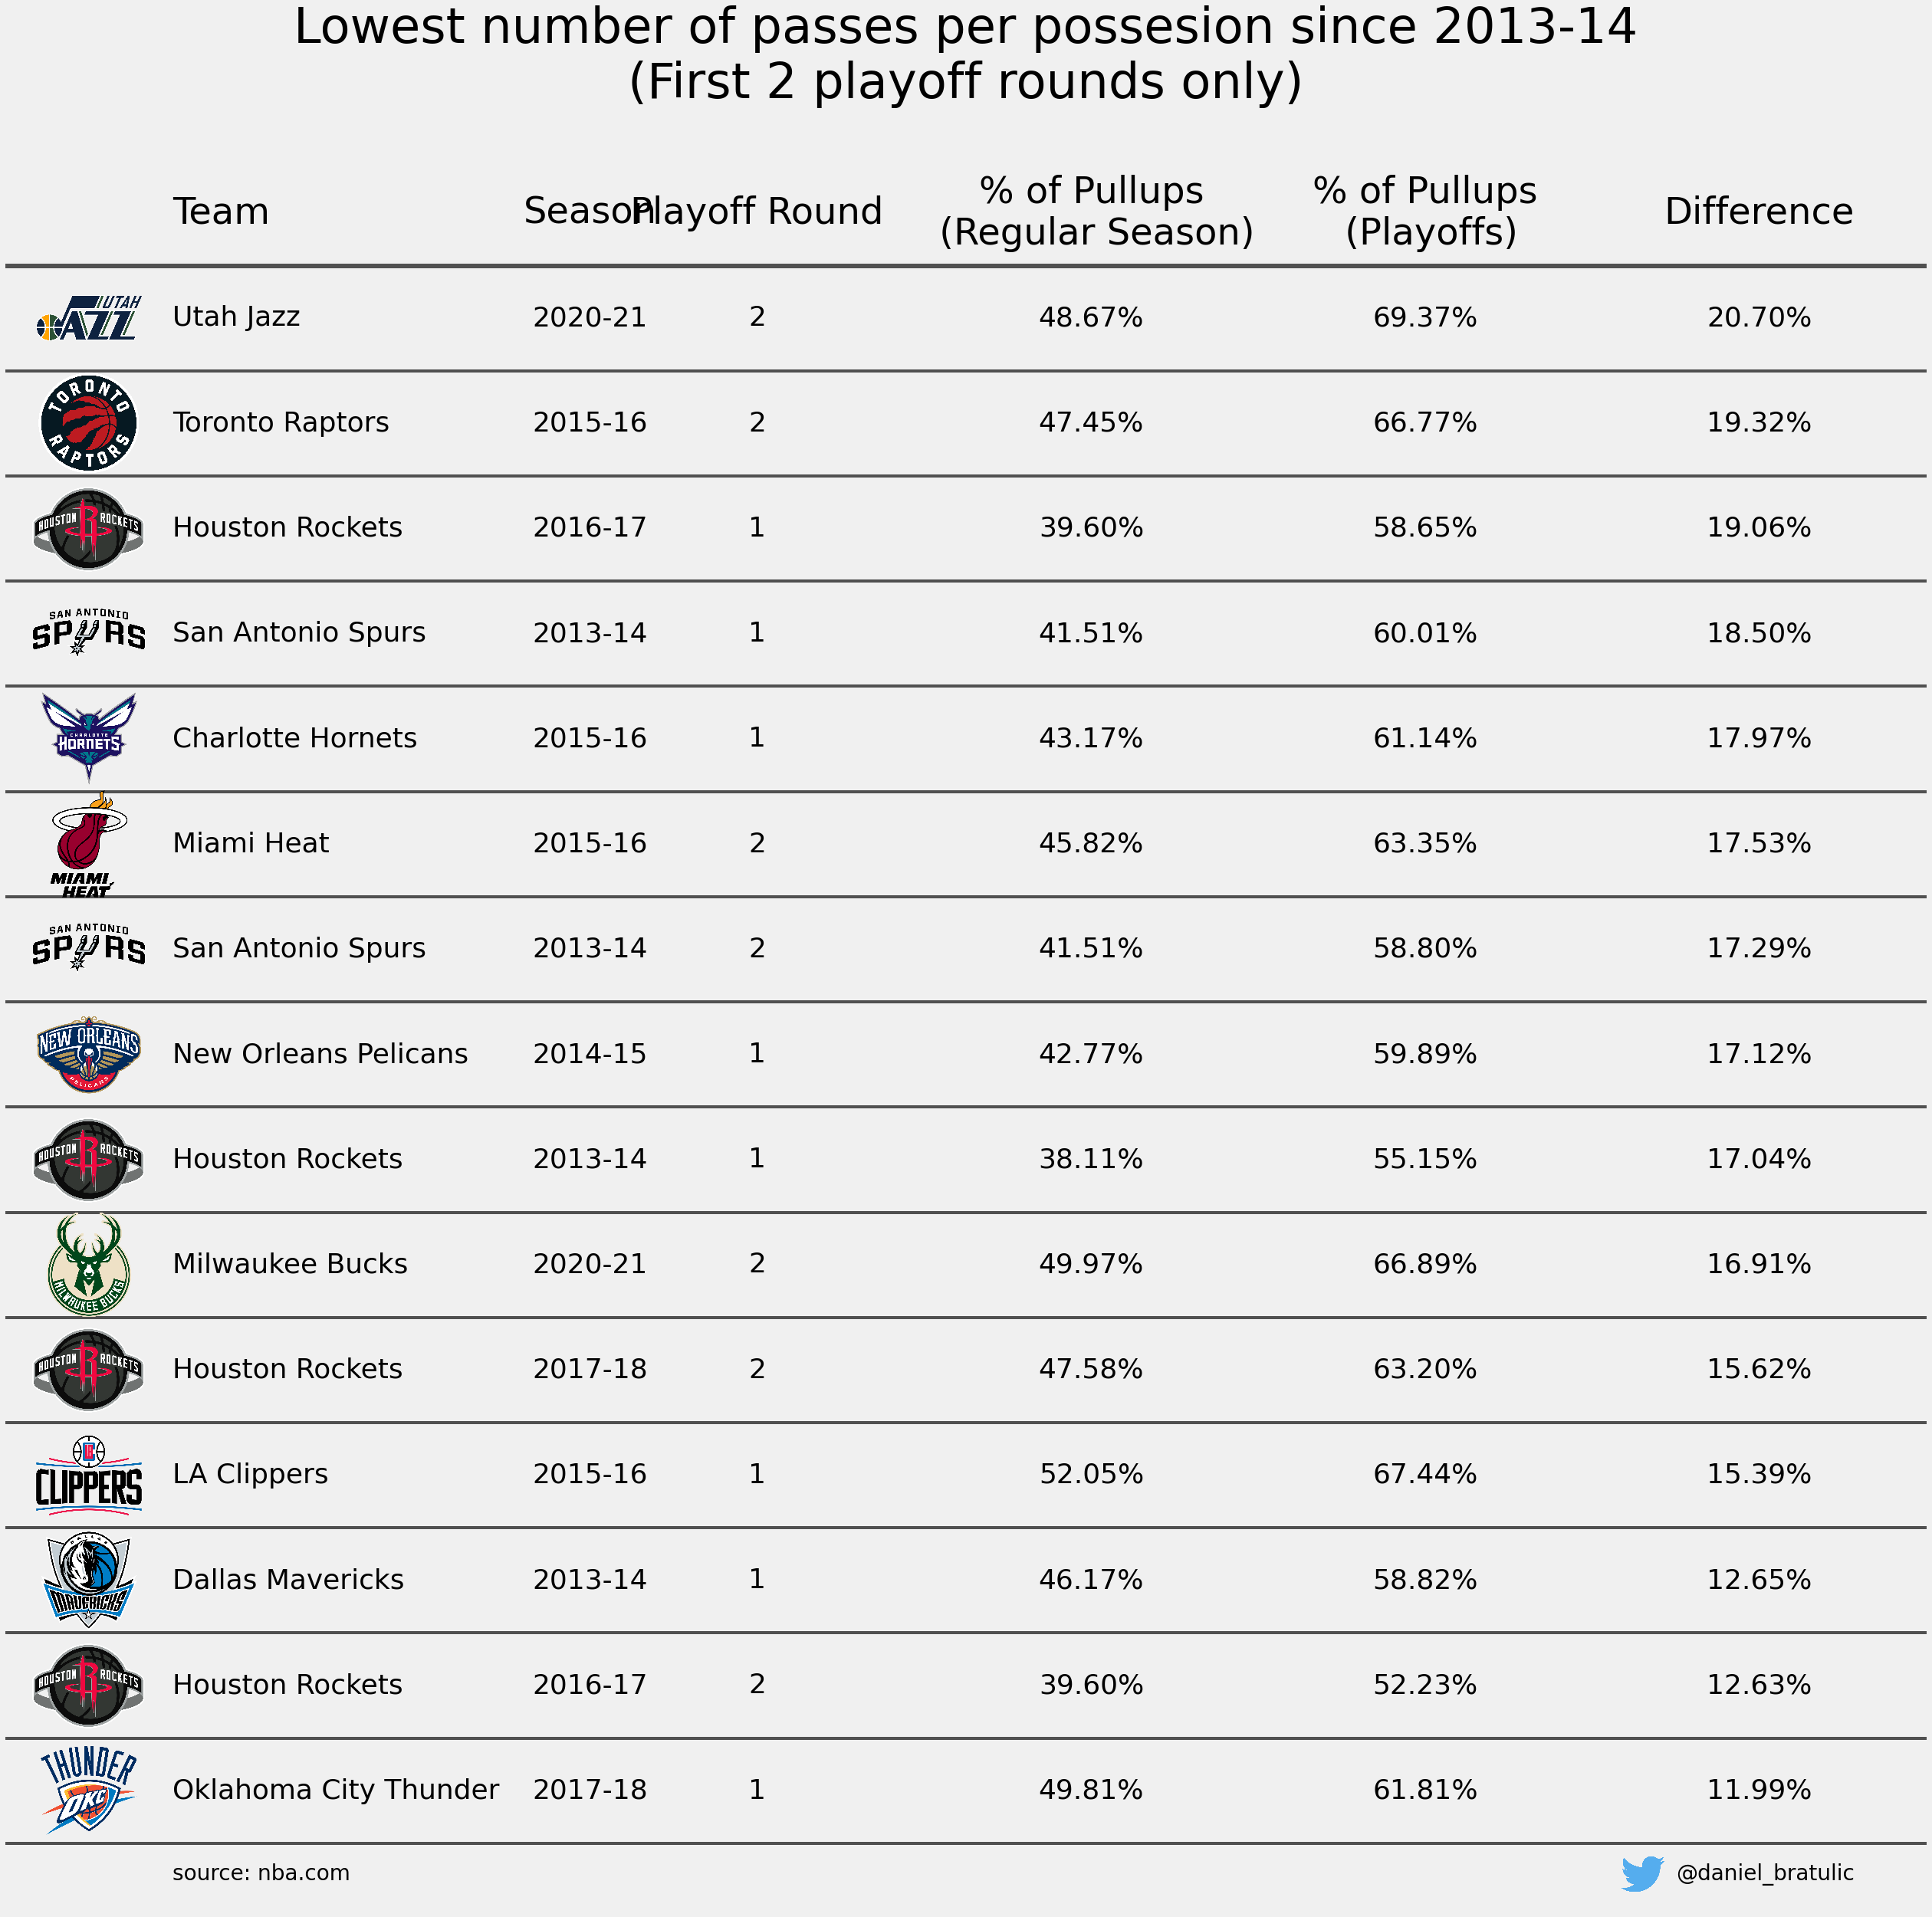

In [122]:
fig, ax = plt.subplots(figsize=(40, 40))
font_size = 36
font_title = 48
title_size = 64
top = len(top_change)
#top = 10

for i in range(top):
    item = top_change.iloc[i]
    y_coord = top - i - 1
    #if i % 2 == 1:
    #    color = bball_cofee
    #    rect = Rectangle((-0.5, y_coord + 0.5), width=5, height=1, fill=True, color=color)
    #    ax.add_patch(rect)
    ab = AnnotationBbox(get_team_img(item.TEAM_ID, zoom=0.2), (0.05, y_coord), frameon=False)
    ax.add_artist(ab)
    ax.text(x=0.1, y=y_coord, ha='left', va='center', s=item.TEAM_NAME, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#1A1A1A', alpha=0.75, lw=4)
    
    ax.text(x=0.35, y=y_coord, ha='center', va='center', s=f"{item.SEASON}", size=font_size)
    ax.text(x=0.45, y=y_coord, ha='center', va='center', s=f"{item.ROUND}", size=font_size)
    ax.text(x=0.65, y=y_coord, ha='center', va='center', s=f"{item.FGA_PCT_PULLUP_REGULAR:.2f}%", size=font_size)
    ax.text(x=0.85, y=y_coord, ha='center', va='center', s=f"{item.FGA_PCT_PULLUP_PLAYOFFS:.2f}%", size=font_size)
    ax.text(x=1.05, y=y_coord, ha='center', va='center', s=f"{item.PULLUP_DIFF:.2f}%", size=font_size)
    #ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (0.05, y_coord), frameon=False)
    
    
ax.text(x=0.1, y=top, s='Team', ha='left', va='center', size=font_title)
ax.text(x=0.35, y=top, s='Season', ha='center', va='center', size=font_title)
ax.text(x=0.45, y=top, s='Playoff Round', ha='center', va='center', size=font_title)
ax.text(x=0.65, y=top, s='% of Pullups\n (Regular Season)', ha='center', va='center', size=font_title)
ax.text(x=0.85, y=top, s='% of Pullups\n (Playoffs)', ha='center', va='center', size=font_title)
ax.text(x=1.05, y=top, s='Difference', ha='center', va='center', size=font_title)


ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, alpha=0.75, lw=6, color='#1A1A1A')
ax.set_title("Lowest number of passes per possesion since 2013-14\n(First 2 playoff rounds only)", size=title_size)

ab = AnnotationBbox(OffsetImage(plt.imread(f'../../../twitter_logo.png'), zoom=0.05), (0.98, -0.8), frameon=False)
ax.add_artist(ab)
ax.text(x=1.0, y=-0.85, ha='left', s='@daniel_bratulic', size=28)
ax.text(x=0.1, y=-0.85, ha='left', s='source: nba.com', size=28)

ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=0, right=1.15)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])

In [123]:
interesting_data.sort_values(by='FGA_PCT_PULLUP_PLAYOFFS', ascending=False).iloc[:15]

,TEAM_ID,TEAM_NAME,SEASON,ROUND,FGA_SUM_REGULAR,FGA_SUM_PLAYOFFS,FGA_PCT_CATCH_AND_SHOOT_REGULAR,FGA_PCT_PULLUP_REGULAR,FGA_PCT_CATCH_AND_SHOOT_PLAYOFFS,FGA_PCT_PULLUP_PLAYOFFS,PULLUP_DIFF,CATCH_SHOOT_DIFF
2,1610612762,Utah Jazz,2020-21,2,52.93,55.50,51.331948,48.668052,30.630631,69.369369,20.701317,-20.701317
0,1610612746,LA Clippers,2015-16,1,51.64,50.16,47.947328,52.052672,32.555821,67.444179,15.391506,-15.391506
0,1610612749,Milwaukee Bucks,2020-21,2,53.61,50.34,50.027980,49.972020,33.114819,66.885181,16.913161,-16.913161
5,1610612761,Toronto Raptors,2015-16,2,43.16,46.86,52.548656,47.451344,33.226633,66.773367,19.322024,-19.322024
0,1610612757,Portland Trail Blazers,2019-20,1,54.14,52.20,40.284448,59.715552,34.482759,65.517241,5.801689,-5.801689
6,1610612748,Miami Heat,2015-16,2,41.84,41.72,54.182600,45.817400,36.649089,63.350911,17.533511,-17.533511
1,1610612745,Houston Rockets,2017-18,2,49.62,50.00,52.418380,47.581620,36.800000,63.200000,15.618380,-15.618380
1,1610612760,Oklahoma City Thunder,2017-18,1,50.61,51.50,50.187710,49.812290,38.194175,61.805825,11.993535,-11.993535
1,1610612738,Boston Celtics,2019-20,1,49.70,53.00,43.601610,56.398390,38.207547,61.792453,5.394062,-5.394062
0,1610612746,LA Clippers,2016-17,1,49.58,44.86,47.599839,52.400161,38.542131,61.457869,9.057708,-9.057708


In [124]:
interesting_data.loc[interesting_data.TEAM_NAME == 'Brooklyn Nets']

,TEAM_ID,TEAM_NAME,SEASON,ROUND,FGA_SUM_REGULAR,FGA_SUM_PLAYOFFS,FGA_PCT_CATCH_AND_SHOOT_REGULAR,FGA_PCT_PULLUP_REGULAR,FGA_PCT_CATCH_AND_SHOOT_PLAYOFFS,FGA_PCT_PULLUP_PLAYOFFS,PULLUP_DIFF,CATCH_SHOOT_DIFF
8,1610612751,Brooklyn Nets,2013-14,1,44.32,40.29,56.994585,43.005415,54.604120,45.395880,2.390465,-2.390465
4,1610612751,Brooklyn Nets,2013-14,2,44.32,42.60,56.994585,43.005415,53.521127,46.478873,3.473458,-3.473458
8,1610612751,Brooklyn Nets,2014-15,1,42.91,45.66,54.206479,45.793521,58.760403,41.239597,-4.553924,4.553924
7,1610612751,Brooklyn Nets,2018-19,1,47.92,48.20,52.358097,47.641903,41.078838,58.921162,11.279259,-11.279259
11,1610612751,Brooklyn Nets,2019-20,1,48.46,63.25,52.373091,47.626909,63.241107,36.758893,-10.868016,10.868016
8,1610612751,Brooklyn Nets,2020-21,1,50.32,46.40,51.748808,48.251192,41.379310,58.620690,10.369497,-10.369497
4,1610612751,Brooklyn Nets,2020-21,2,50.32,62.33,51.748808,48.251192,40.638537,59.361463,11.110271,-11.110271
